In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium
import geopy


from sklearn import preprocessing, cluster
import scipy

In [ ]:
dtf = pd.read_csv('https://raw.githubusercontent.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/refs/heads/master/machine_learning/data_stores.csv')
dtf.columns.tolist()

['Brand',
 'Store Number',
 'Store Name',
 'Ownership Type',
 'Street Address',
 'City',
 'State/Province',
 'Country',
 'Postcode',
 'Phone Number',
 'Timezone',
 'Longitude',
 'Latitude']

In [ ]:
filter = "Las Vegas"
dtf = dtf[dtf["City"]==filter] [["City", "Street Address", "Longitude", "Latitude"]].reset_index(drop=True)
dtf = dtf.reset_index().rename(columns={"index":"id"})
dtf.head()

,id,City,Street Address,Longitude,Latitude
0,0,Las Vegas,4507 Flamingo Rd,-115.20,36.12
1,1,Las Vegas,"475 E Windmill Lane, Fashion Show",-115.15,36.04
2,2,Las Vegas,"3200 LAS VEGAS BLVD. S., STE 1795",-115.17,36.13
3,3,Las Vegas,8350 W Cheyenne Ave,-115.28,36.22
4,4,Las Vegas,3730 LAS VEGAS BLVD S,-115.18,36.11


In [ ]:
dtf["Potencial"] = np.random.randint(low=3, high=10+1, size=len(dtf))
dtf["staff"] = dtf["Potencial"].apply(lambda x: int(np.random.rand()*x)+1)
dtf["Capacity"] = dtf["Potencial"] - dtf["staff"]
dtf["Cost"] = np.random.choice(["high", "medium", "low"], size=len(dtf), p=[0.4,0.5,0.1])
dtf.head()

,id,City,Street Address,Longitude,Latitude,Potencial,staff,Capacity,Cost
0,0,Las Vegas,4507 Flamingo Rd,-115.20,36.12,5,5,0,medium
1,1,Las Vegas,"475 E Windmill Lane, Fashion Show",-115.15,36.04,4,2,2,medium
2,2,Las Vegas,"3200 LAS VEGAS BLVD. S., STE 1795",-115.17,36.13,6,4,2,medium
3,3,Las Vegas,8350 W Cheyenne Ave,-115.28,36.22,10,9,1,medium
4,4,Las Vegas,3730 LAS VEGAS BLVD S,-115.18,36.11,3,3,0,medium


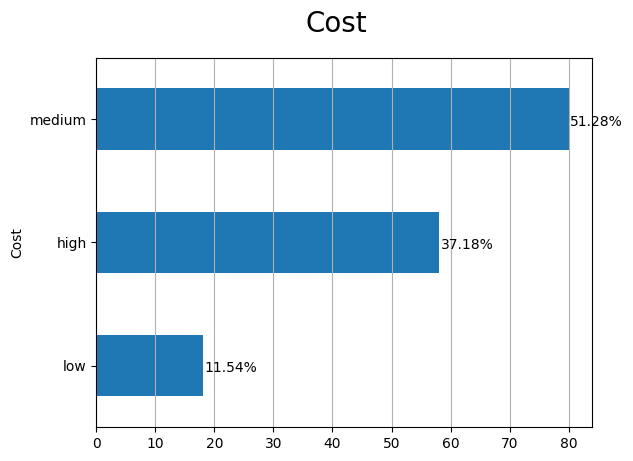

In [ ]:
x = "Cost"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals = []
for i in ax.patches:
  totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
          str(round((i.get_width()/total)*100, 2))+'%',
          fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

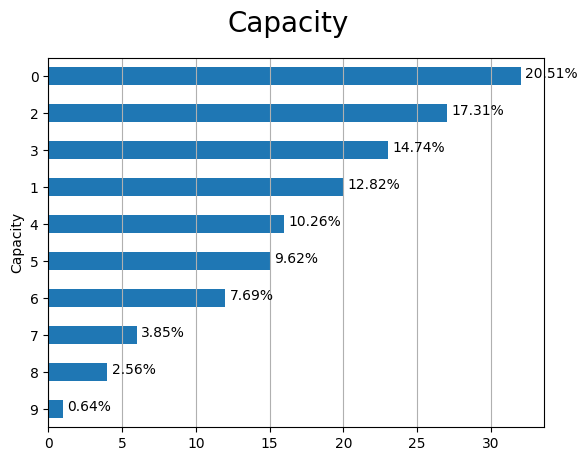

In [ ]:
x = "Capacity"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals = []
for i in ax.patches:
  totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
          str(round((i.get_width()/total)*100, 2))+'%',
          fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

In [ ]:
city = "Las Vegas"
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)

location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Las Vegas, Clark County, Nevada, United States
[lat, long]: [36.2533896, -115.2794366262601]


In [ ]:
x,y = "Latitude", "Longitude"
color = "Cost"
size = "staff"
popup = "Street Address"
data = dtf.copy()

lst_colors=["red", "green", "orange"]
lst_elements = sorted(list(dtf[color].unique()))
data["color"] = data[color].apply(lambda x:
                                  lst_colors[lst_elements.index(x)])

scaler =  preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

map_ = folium.Map(location=location, titles="cartodbpositron",
                  zoom_start=11)

data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]) .add_to(map_), axis=1)

legend_html = f"""<div style="position:fixed; bottom:10px; border:2px solid:black; z-index:9999; font-size:14px;">&nbsp;<b>{color}:</b><br></div>"""
for i in lst_elements:
  legend_html = legend_html+"""&nbsp;<i class="fa fa-circle
  fa-lx" style="color:""" +lst_colors[lst_elements.index(i)] + """">
  </i>&nbsp;"""+str(i)+"""<br>"""

legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

map_